# Midterm Project (SSD): Implementing Object Detection on a Dataset

## Selection of Dataset and Algorithm
* Each student will choose a dataset suitable for object detection tasks. The dataset can be from publicly available sources **(e.g., COCO, PASCAL VOC)** or one they create.
* Select an object detection algorithm to apply to the chosen dataset. Possible algorithms include:
  * **YOLO (You Only Look Once)**: A real-time deep learning-based approach.
  * **SSD (Single Shot MultiBox Detector)**: A deep learning method balancing speed and accuracy.

### Dataset Information

The dataset utilized for this midterm activity is the Oxford-IIIT Pet Dataset, developed by the Visual Geometry Group at Oxford. This dataset consists of 37 categories of pet images, with approximately 200 images per class. The images exhibit significant variations in scale, pose, and lighting conditions. Each image is accompanied by detailed annotations, including breed classification, head region of interest (ROI), and pixel-level trimap segmentation.

The dataset includes 12 cat breeds and 25 dog breeds, listed as follows:

**Cat Breeds**:
- Abyssinian
- Bengal
- Birman
- Bombay
- British Shorthair
- Egyptian Mau
- Maine Coon
- Persian
- Ragdoll
- Russian Blue
- Siamese
- Sphynx

**Dog Breeds**:
- American Bulldog
- American Pit Bull Terrier
- Basset Hound
- Beagle
- Boxer
- Chihuahua
- English Cocker Spaniel
- English Setter
- German Shorthaired
- Great Pyrenees
- Havanese
- Japanese Chin
- Keeshond
- Leonberger
- Miniature Pinscher
- Newfoundland
- Pomeranian
- Pug
- Saint Bernard
- Samoyed
- Scottish Terrier
- Shiba Inu
- Staffordshire Bull Terrier
- Wheaten Terrier
- Yorkshire Terrier

Parkhi, O. M., Vedaldi, A., Zisserman, A., & Jawahar, C. V. (2012). Cats and dogs. In *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition*. Institute of Electrical and Electronics Engineers.

## Implementation

### Data Preparation

- Preprocess the dataset by resizing images, normalizing pixel values, and, if necessary, labeling bounding boxes for objects.

In [ ]:
# Import the Roboflow library for interacting with the API
from roboflow import Roboflow

rf = Roboflow(api_key="TUXckiOYdWfPKbzjriHg")
project = rf.workspace("feature-extraction-p1jos").project("cat-dog-breeds")
version = project.version(1)
dataset = version.download("tfrecord")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cat-&-Dog-Breeds-1 in tfrecord:: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]


### Model Building

- Implement the selected object detection algorithm using appropriate libraries.

In [ ]:
# Download the pre-trained SSD MobileNet V2 model from TensorFlow's model repository.
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

# Extract the contents of the downloaded tar.gz archive.
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2024-11-27 22:13:16--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  14.1MB/s    in 3.1s    

2024-11-27 22:13:19 (14.1 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320

In [ ]:
# Install a specific version of the protobuf library.
!pip install protobuf==3.20.*
# Uninstall the existing version of Cython because uninstalling it can resolve potential conflicts of TensorFlow Object Detection API components.
!pip uninstall Cython -y
# Clone the TensorFlow Models repository from GitHub.
!git clone --depth 1 https://github.com/tensorflow/models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


Found existing installation: Cython 3.0.11
Uninstalling Cython-3.0.11:
  Successfully uninstalled Cython-3.0.11
Cloning into 'models'...
remote: Enumerating objects: 4305, done.
remote: Counting objects: 100% (4305/4305), done.
remote: Compressing objects: 100% (3322/3322), done.
remote: Total 4305 (delta 1208), reused 2218 (delta 910), pack-reused 0 (from 0)
Receiving objects: 100% (4305/4305), 53.17 MiB | 17.72 MiB/s, done.
Resolving deltas: 100% (1208/1208), done.


In [ ]:
%%bash
# Change the current working directory to the 'research' directory inside the TensorFlow Models repository.
cd models/research/
# Compile all `.proto` files located in the 'object_detection/protos/' directory.
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
import re

# Define file paths for input and output
input_file_path = '/content/models/research/object_detection/packages/tf2/setup.py'
output_file_path = '/content/models/research/setup.py'

# Read the content of the existing setup.py file
with open(input_file_path) as f:
    setup_content = f.read()

# Modify the dependency version for 'tf-models-official'
with open(output_file_path, 'w') as f:
    updated_content = re.sub('tf-models-official>=2.5.1', 'tf-models-official==2.8.0', setup_content)
    f.write(updated_content)

In [ ]:
%%bash
# Install a specific version of PyYAML specifically version 5.3 to avoid potential compatibility issues with other components.
pip install pyyaml==5.3
# Install the TensorFlow Object Detection API from the local directory
pip install /content/models/research/
# Install TensorFlow version 2.8.0 specifically version 2.8.0 to ensure compatibility with the Object Detection API and other dependencies.
pip install tensorflow==2.8.0
# Install TensorFlow I/O version 0.23.1 specifically version 0.23.1 to match TensorFlow 2.8.0 and ensure seamless integration.
pip install tensorflow_io==0.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyyaml: filename=PyYAML-5.3-cp310-cp310-linux_x86_64.whl size=44244 sha256=bfac8c8d5a4a2869d66975c7b1aed574be70aa8c6766b32bfb79e5b95f00514d
  Stored in directory: /root/.cache/pip/wheels/0d/72/68/a263cfc14175636cf26bada99f13b735be1b60a11318e08bfc
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
Processing ./models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.10.0 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
flax 0.8.5 requires PyYAML>=5.4.1, but you have pyyaml 5.3 which is incompatible.
roboflow 1.1.49 requires PyYAML>=5.3.1, but you have pyyaml 5.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.10.0 requires cloudpickle>=3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
dask 2024.10.0 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
pandas-gbq 0.24.0

### Training the Model

- Use the training data to train the object detection model. For deep learning methods, fine-tune hyperparameters (e.g., learning rate, batch size, epochs) to optimize model performance.

In [ ]:
# Copy the pipeline configuration file to the specified directory
!cp /content/ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config /content/models/research/object_detection/configs/cat_dog_pipeline.config

In [ ]:
import tensorflow as tf
import re

# Path to the pipeline configuration file to be modified
config_path = "/content/models/research/object_detection/configs/cat_dog_pipeline.config"

# Open the configuration file for reading
with open(config_path, "r") as file:
    config = file.read()

# Update the label map path for the training dataset
config = re.sub(r"label_map_path:.*",
                "label_map_path: '/content/Cat-&-Dog-Breeds-1/train/cat-dog_label_map.pbtxt'",
                config)

# Update the paths for the training input TFRecord file and its corresponding label map
config = re.sub(r"train_input_reader.*\{[^}]*input_path:.*\}",
                """train_input_reader {
    label_map_path: '/content/Cat-&-Dog-Breeds-1/train/cat-dog_label_map.pbtxt'
    tf_record_input_reader {
        input_path: '/content/Cat-&-Dog-Breeds-1/train/cat-dog.tfrecord'
    }
}""",
                config, flags=re.DOTALL)

# Update the paths for the validation input TFRecord file and its corresponding label map
config = re.sub(r"eval_input_reader.*\{[^}]*input_path:.*\}",
                """eval_input_reader {
    label_map_path: '/content/Cat-&-Dog-Breeds-1/valid/cat-dog_label_map.pbtxt'
    shuffle: false
    num_epochs: 1
    tf_record_input_reader {
        input_path: '/content/Cat-&-Dog-Breeds-1/valid/cat-dog.tfrecord'
    }
}""",
                config, flags=re.DOTALL)

# Update the fine-tune checkpoint path to use the pre-trained SSD MobileNet model's checkpoint
config = re.sub(r"fine_tune_checkpoint:.*",
                "fine_tune_checkpoint: '/content/ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0'",
                config)

# Set the number of classes (12 cat breeds + 25 dog breeds = 37 total)
config = re.sub(r"num_classes:.*", "num_classes: 37", config)

# Adjust the batch size for training (chosen based on hardware resources)
config = re.sub(r"batch_size:.*", "batch_size: 16", config)

# Specify the fine-tune checkpoint type as 'detection' for transfer learning
config = re.sub(r"fine_tune_checkpoint_type:.*",
                "fine_tune_checkpoint_type: 'detection'",
                config)

# Extend the number of training steps for better model performance
config = re.sub(r"num_steps:.*", "num_steps: 50000", config)

# Adjust the learning rate settings for longer training sessions
config = re.sub(r"learning_rate_base:.*", "learning_rate_base: 0.0002", config)
config = re.sub(r"warmup_learning_rate:.*", "warmup_learning_rate: 0.00001", config)
config = re.sub(r"total_steps:.*", "total_steps: 50000", config)

# Optional: Update the learning rate decay steps for smoother optimization
config = re.sub(r"learning_rate_decay_steps:.*", "learning_rate_decay_steps: 5000", config)

# Save the modified configuration file back to disk
with open(config_path, "w") as file:
    file.write(config)

# Confirmation message to indicate successful update
print("Configuration file updated successfully!")

Configuration file updated successfully!


In [ ]:
# Verify the number of classes in the label map
label_map_path = "/content/Cat-&-Dog-Breeds-1/train/cat-dog_label_map.pbtxt"
with open(label_map_path, 'r') as file:
    label_map_content = file.read()

# Count the number of items in the label map
num_items = len(re.findall(r'item', label_map_content))
print(f"Number of classes in label map: {num_items}")

# Extract num_classes from the config
num_classes_match = re.search(r'num_classes:\s*(\d+)', config)
if num_classes_match:
    num_classes = int(num_classes_match.group(1))
    print(f"Number of classes in config: {num_classes}")

Number of classes in label map: 37
Number of classes in config: 37


In [ ]:
# Install TensorFlow IO (specific version for compatibility with TensorFlow 2.8.0)
!pip install tensorflow_io==0.23.1
# Download the CUDA repository PIN file to set repository priority
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
# Move the PIN file to the directory where APT preferences are configured
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
# Download the CUDA 11.0.2 local installer for Ubuntu 18.04
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
# Install the CUDA repository package to allow APT to manage CUDA installation
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
# Add the repository's public key to the system, enabling secure package installation
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
# Update the package lists to include the new CUDA repository
!apt-get update
# Install the CUDA Toolkit version 11.0
!sudo apt-get install cuda-toolkit-11-0 -y
# Set the LD_LIBRARY_PATH environment variable to include CUDA libraries
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

--2024-11-27 22:16:59--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2024-11-27 22:16:59 (5.46 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2024-11-27 22:16:59--  http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:80... connected.
HTTP request sent, awaiting response... 301 Mov

In [ ]:
# Check the number of available GPUs on the system
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Check if TensorFlow is built with CUDA support
print("CUDA Available: ", tf.test.is_built_with_cuda())

Num GPUs Available:  1
CUDA Available:  True


In [ ]:
# Get a list of all available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Check if GPUs are available
if gpus:
    try:
        # Enable memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Catch and print any errors that occur during the configuration
        print(e)

In [ ]:
# Change the working directory to the research folder inside the models directory
%cd /content/models/research/

# This command initiates the training process for the SSD (Single Shot Multibox Detector) object detection model
!python object_detection/model_main_tf2.py \
    # Specify the path to the pipeline config file, which contains all necessary configurations for the model.
    --pipeline_config_path="/content/models/research/object_detection/configs/cat_dog_pipeline.config" \
    # Define the directory where the model checkpoints will be stored.
    --model_dir="/content/models/research/object_detection/training/" \
    # Set the number of training steps, i.e., the total number of iterations the model will run during training.
    --num_train_steps=50000 \
    # Set this flag to False to indicate that we are not using TPU (Tensor Processing Unit) acceleration for this training session.
    --use_tpu=False \
    # This flag allows the TensorFlow logs to be printed both to the console and to standard error.
    --alsologtostderr

Streaming output truncated to the last 5000 lines.
 'Loss/regularization_loss': 0.08641944,
 'Loss/total_loss': 1.0106238,
 'learning_rate': 0.00019135454}
I1127 22:56:27.323885 137718348947456 model_lib_v2.py:708] {'Loss/classification_loss': 0.7746156,
 'Loss/localization_loss': 0.14958873,
 'Loss/regularization_loss': 0.08641944,
 'Loss/total_loss': 1.0106238,
 'learning_rate': 0.00019135454}
INFO:tensorflow:Step 8500 per-step time 0.237s
I1127 22:56:51.013238 137718348947456 model_lib_v2.py:705] Step 8500 per-step time 0.237s
INFO:tensorflow:{'Loss/classification_loss': 0.55271745,
 'Loss/localization_loss': 0.119449854,
 'Loss/regularization_loss': 0.08642015,
 'Loss/total_loss': 0.7585875,
 'learning_rate': 0.00019108638}
I1127 22:56:51.013589 137718348947456 model_lib_v2.py:708] {'Loss/classification_loss': 0.55271745,
 'Loss/localization_loss': 0.119449854,
 'Loss/regularization_loss': 0.08642015,
 'Loss/total_loss': 0.7585875,
 'learning_rate': 0.00019108638}
INFO:tensorflow:S

In [ ]:
# This command is used to export the trained object detection model to a format that can be used for inference (prediction).
!python object_detection/exporter_main_v2.py \
    # Specify the input type as 'image_tensor'. This indicates that the model expects input in the form of an image tensor during inference.
    --input_type=image_tensor \
    # Provide the path to the pipeline configuration file used during training.
    --pipeline_config_path="/content/models/research/object_detection/configs/cat_dog_pipeline.config" \
    # Provide the path to the trained model checkpoint directory.
    --trained_checkpoint_dir="/content/models/research/object_detection/training/" \
    # Define the output directory where the exported model will be saved.
    --output_directory="/content/models/research/object_detection/exported_model/"

2024-11-28 01:39:51.777314: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1128 01:39:52.051470 135620231917568 deprecation.py:610] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
I1128 01:39:57.820404 1356202319

### Testing

- Evaluate the model on a test set to assess its detection capabilities. Ensure to capture edge cases where the model may struggle.

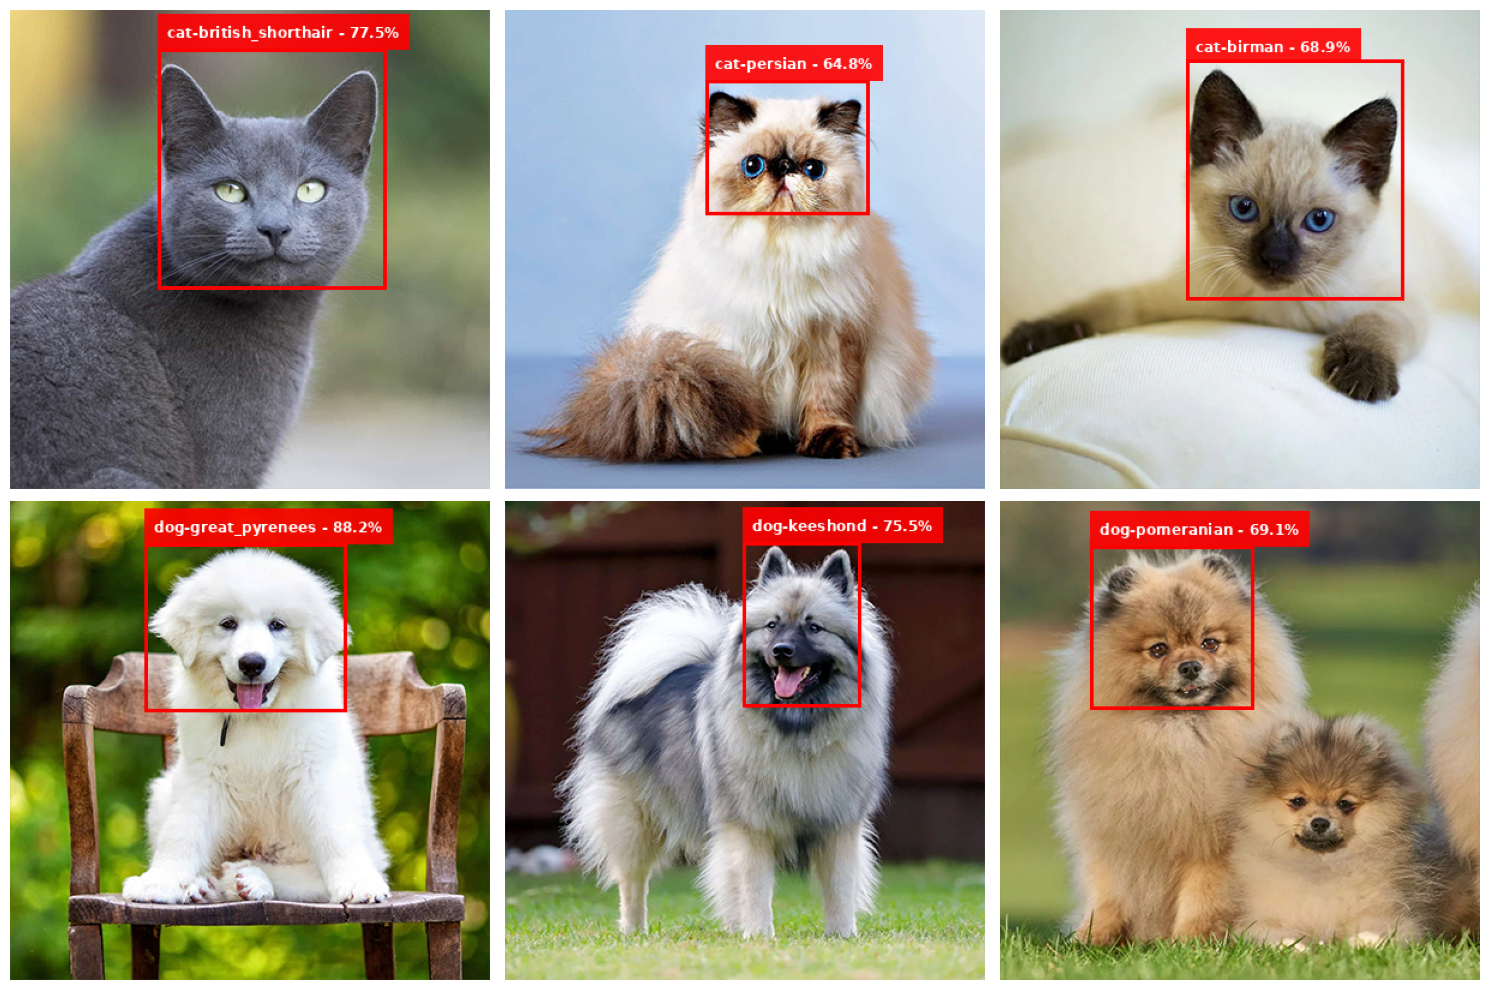


Performance Metrics:
-------------------
Image Name: cat-british-shorthair.png
Total Detections: 2
High Confidence Detections (>50%): 1
Average Confidence: 77.55%
Detection Time: 4639.06ms

Class Distribution:
--------------------
cat-british_shorthair: 1

Performance Metrics:
-------------------
Image Name: cat-persian.png
Total Detections: 1
High Confidence Detections (>50%): 1
Average Confidence: 64.83%
Detection Time: 71.06ms

Class Distribution:
--------------------
cat-persian: 1

Performance Metrics:
-------------------
Image Name: cat-siamese.png
Total Detections: 2
High Confidence Detections (>50%): 1
Average Confidence: 68.95%
Detection Time: 69.66ms

Class Distribution:
--------------------
cat-birman: 1

Performance Metrics:
-------------------
Image Name: dog-great-pyreness.png
Total Detections: 2
High Confidence Detections (>50%): 1
Average Confidence: 88.19%
Detection Time: 32.80ms

Class Distribution:
--------------------
dog-great_pyrenees: 1

Performance Metrics:
---

<Figure size 640x480 with 0 Axes>

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
import time
from collections import defaultdict

# Constants for visualization
BOX_THICKNESS = 3        # Thickness of the bounding box around detected objects
FONT_SIZE = 12           # Font size for labels
TEXT_PADDING = 8         # Padding for text background
BOX_COLOR = (255, 0, 0)  # Color of bounding boxes (red in RGB)
TEXT_BG_ALPHA = 230      # Transparency level of the text background

def load_model():
    """Load the trained SSD MobileNet model for object detection.

    This function loads a pre-trained model from the specified directory where the saved model is stored.
    It returns the model's detection function, which can then be used to perform inference on input images.

    Returns:
        detect_fn (function): The detection function for the trained SSD MobileNet model.
    """
    # Path to the saved model directory.
    saved_model_path = "/content/models/research/object_detection/exported_model/saved_model"
    # Load the model using TensorFlow's saved_model.load method.
    detect_fn = tf.saved_model.load(saved_model_path)
    # Return the detection function that can be used to run inference.
    return detect_fn

def load_label_map():
    """Load the label map for class names associated with the dataset.

    This function reads the label map from a `.pbtxt` file. The label map contains the mapping between the
    class IDs and their corresponding breed names (e.g., cat breeds, dog breeds). It returns a dictionary
    that can be used to interpret the output of the object detection model.

    Returns:
        label_map (dict): A dictionary mapping class IDs to breed names.
    """
    # Path to the label map file.
    label_map_path = "/content/Cat-&-Dog-Breeds-1/train/cat-dog_label_map.pbtxt"
    # Initialize an empty dictionary to store the label map.
    label_map = {}

    # Open and read the label map file.
    with open(label_map_path, 'r') as f:
        current_item = {}  # Temporary dictionary to hold a single label item.
        # Read through each line of the label map file.
        for line in f:
            line = line.strip()  # Remove leading and trailing whitespace.
            # Detect the start of a new item in the label map.
            if line == 'item {':
                current_item = {}  # Reset the current item for each new label.
            # When an item ends, check if it contains both 'id' and 'name' before adding to the label map.
            elif line == '}':
                if 'id' in current_item and 'name' in current_item:
                    label_map[current_item['id']] = current_item['name']
            # Extract the breed name.
            elif 'name:' in line:
                current_item['name'] = line.split(':')[1].strip().strip('"')  # Clean the name string.
            # Extract the class ID.
            elif 'id:' in line:
                current_item['id'] = int(line.split(':')[1].strip().rstrip(','))  # Clean and convert to integer.

    # Return the constructed label map.
    return label_map

def get_image_paths():
    """Return a list of file paths to the sample images for detection.

    This function returns a predefined list of image file paths that will be used for testing or visualizing
    the object detection results. These images contain various cat and dog breeds to be processed by the model.

    Returns:
        image_paths (list): A list of file paths to the images that will be used in the detection process.
    """
    # List of image file paths to test the model.
    image_paths = [
        '/content/cat-british-shorthair.png',  # Example image of a British Shorthair cat.
        '/content/cat-persian.png',            # Example image of a Persian cat.
        '/content/cat-siamese.png',            # Example image of a Siamese cat.
        '/content/dog-great-pyreness.png',     # Example image of a Great Pyrenees dog.
        '/content/dog-keeshond.png',           # Example image of a Keeshond dog.
        '/content/dog-pomeranian.png'          # Example image of a Pomeranian dog.
    ]

    # Return the list of image paths.
    return image_paths

def crop_to_square(image):
    """Crop image to a square (1:1 aspect ratio) from the center.

    This function takes an image and crops it to a square by selecting the center portion,
    ensuring that both the width and height are equal. The smallest dimension of the image
    is used to determine the size of the cropped square.

    Args:
        image (PIL.Image): The input image to be cropped.

    Returns:
        PIL.Image: The cropped square image.
    """
    # Get the dimensions of the image (width and height).
    width, height = image.size

    # Determine the size of the square by taking the minimum of the width and height.
    size = min(width, height)

    # Calculate the cropping coordinates to center the square.
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size

    # Crop and return the image as a square.
    return image.crop((left, top, right, bottom))

def process_single_image(image_path, detect_fn, label_map):
    """Process a single image and perform object detection.

    This function loads an image, prepares it for the SSD MobileNet model, runs object detection,
    and visualizes the results by drawing bounding boxes and labels on the image. It returns the
    processed image and a dictionary of metrics, including detection time and confidence.

    Args:
        image_path (str): The path to the image file to be processed.
        detect_fn (function): The object detection function (from the loaded model).
        label_map (dict): A dictionary mapping class IDs to breed names.

    Returns:
        PIL.Image: The processed image with bounding boxes and labels drawn.
        dict: A dictionary containing various metrics from the detection.
    """
    # Open the image from the specified path.
    image = Image.open(image_path)
    # Convert the image to RGB to ensure it has 3 color channels.
    image = image.convert('RGB')
    # Convert the PIL image to a numpy array for compatibility with TensorFlow.
    input_image = np.array(image)

    # Convert the numpy array to a TensorFlow tensor and add a batch dimension.
    input_tensor = tf.convert_to_tensor(input_image)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Measure the time taken for detection.
    start_time = time.time()
    # Run the object detection on the input image.
    detections = detect_fn(input_tensor)
    # Calculate the detection time.
    detection_time = time.time() - start_time
    # Define the confidence threshold for filtering out low-confidence detections.
    confidence_threshold = 0.5

    # Collect valid detections (those with confidence above the threshold).
    valid_detections = [
        (det[0], det[1], det[2])  # Format: (confidence, class_id, bounding_box)
        for det in zip(
            detections['detection_scores'][0],   # Detection scores (confidence).
            detections['detection_classes'][0],  # Class IDs for each detection.
            detections['detection_boxes'][0]     # Bounding boxes for each detection.
        ) if det[0] > confidence_threshold       # Only keep detections above the confidence threshold.
    ]

    # If there are valid detections, select the one with the highest confidence.
    if valid_detections:
        best_detection = max(valid_detections, key=lambda x: x[0])
        class_id = int(best_detection[1])  # Class ID of the best detection.
        class_name = label_map.get(class_id, f"Unknown (ID: {class_id})")  # Map ID to class name.
    else:
        class_name = "No detection"  # No valid detections found.

    # Create a copy of the image to draw on.
    draw_image = image.copy()
    draw_image = draw_image.convert('RGBA')  # Convert to RGBA to handle transparency for text background.
    # Initialize drawing context for the image.
    draw = ImageDraw.Draw(draw_image)

    # Load font for displaying class labels on the image.
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", FONT_SIZE)
    except:
        font = ImageFont.load_default()  # Fall back to the default font if the specified font is not found.

    # Draw the bounding box and label text if there are valid detections.
    if valid_detections:
        score, class_id, box = best_detection
        ymin, xmin, ymax, xmax = box

        # Rescale the bounding box coordinates to match the original image dimensions.
        xmin = int(xmin * input_image.shape[1])
        xmax = int(xmax * input_image.shape[1])
        ymin = int(ymin * input_image.shape[0])
        ymax = int(ymax * input_image.shape[0])

        # Draw the bounding box on the image.
        for i in range(BOX_THICKNESS):
            draw.rectangle([xmin+i, ymin+i, xmax-i, ymax-i], outline=BOX_COLOR)

        # Create the label text displaying class name and confidence score.
        label_text = f"{class_name} - {score*100:.1f}%"

        # Calculate the bounding box for the label text.
        text_bbox = draw.textbbox((0, 0), label_text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

        # Define the background box for the label text (with padding).
        bg_x1 = xmin
        bg_y1 = max(0, ymin - text_height - TEXT_PADDING * 2)
        bg_x2 = xmin + text_width + TEXT_PADDING * 2
        bg_y2 = ymin

        # Create a semi-transparent background for the text label.
        overlay = Image.new('RGBA', draw_image.size, (0, 0, 0, 0))
        overlay_draw = ImageDraw.Draw(overlay)
        overlay_draw.rectangle([bg_x1, bg_y1, bg_x2, bg_y2], fill=(*BOX_COLOR, TEXT_BG_ALPHA))

        # Composite the overlay with the draw_image to add the background.
        draw_image = Image.alpha_composite(draw_image, overlay)
        draw = ImageDraw.Draw(draw_image)

        # Draw the label text on the image.
        draw.text((bg_x1 + TEXT_PADDING, bg_y1 + TEXT_PADDING), label_text, fill="white", font=font)

    # Convert the image back to RGB after drawing.
    draw_image = draw_image.convert('RGB')
    # Crop the image to a square after drawing the bounding box and label.
    processed_image = crop_to_square(draw_image)

    # Prepare metrics for logging and analysis.
    metrics = {
        'image_name': os.path.basename(image_path),
        'total_detections': len(valid_detections),
        'high_confidence_detections': 1 if valid_detections else 0,
        'avg_confidence': best_detection[0] if valid_detections else 0,
        'detection_time': detection_time,
        'class_distribution': {class_name: 1}
    }

    # Return the processed image and the metrics.
    return processed_image, metrics

def display_grid(images):
    """Display processed images in a 3x2 grid.

    This function takes a list of processed images and displays them in a 3x2 grid layout using Matplotlib.

    Args:
        images (list): A list of PIL images that will be displayed.
    """
    # Create a figure with 2 rows and 3 columns of subplots.
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    # Adjust the spacing between subplots for better visual appearance.
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Loop through the axes and images, displaying each image in the corresponding subplot.
    for idx, (ax, img) in enumerate(zip(axes.flat, images)):
        ax.imshow(img)  # Show the image on the axis.
        ax.axis('off')  # Hide the axis to focus on the image.

    # Adjust layout for a cleaner presentation.
    plt.tight_layout()
    # Start interactive mode (useful for dynamic visualizations).
    plt.ion()
    # Display the plot.
    plt.show(block=True)
    # Pause briefly to allow the plot to render.
    plt.pause(0.1)
    # Save the grid of images to a file.
    plt.savefig('processed_images_grid.png')

def process_images():
    """Main processing pipeline.

    This function orchestrates the image loading, processing, and visualization steps. It uses
    the object detection model to process a set of images, collects the metrics, and displays
    the results in a grid format.

    """
    # Load the object detection model and label map for class identification.
    detect_fn = load_model()  # Load the detection function (model).
    label_map = load_label_map()  # Load the label map for class names.

    # Get the paths to the images that need to be processed.
    image_paths = get_image_paths()

    # Initialize empty lists to store the processed images and their respective metrics.
    processed_images = []
    metrics_list = []

    # Process each image in the image_paths list.
    for image_path in image_paths:
        # Process the image, get the result and metrics.
        processed_image, metrics = process_single_image(image_path, detect_fn, label_map)

        # Append the processed image and its metrics to their respective lists.
        processed_images.append(processed_image)
        metrics_list.append(metrics)

    # Display all processed images in a 3x2 grid.
    display_grid(processed_images)

    # Print the metrics for each processed image.
    for metrics in metrics_list:
        print_metrics(metrics)

def print_metrics(metrics):
    """Print metrics in a structured format.

    This function prints the performance metrics for an image in a readable format.
    The metrics include total detections, high confidence detections, average confidence,
    detection time, and class distribution.

    Args:
        metrics (dict): A dictionary containing performance metrics for a single image.
    """
    print("\nPerformance Metrics:")
    print("-------------------")
    # Print the image name and other performance metrics.
    print(f"Image Name: {metrics['image_name']}")
    print(f"Total Detections: {metrics['total_detections']}")
    print(f"High Confidence Detections (>50%): {metrics['high_confidence_detections']}")
    print(f"Average Confidence: {metrics['avg_confidence']*100:.2f}%")
    print(f"Detection Time: {metrics['detection_time']*1000:.2f}ms")  # Time in milliseconds.

    print("\nClass Distribution:")
    print("-" * 20)
    # Print the class distribution (number of detections per class).
    for cls, count in metrics['class_distribution'].items():
        print(f"{cls}: {count}")

# Uncomment the line below if running as a script.
process_images()

## Evaluation

* **Performance Metrics**: Assess the model's performance using various metrics, including:
  * **Accuracy**: Overall success rate of object detection.
  * **Precision**: The proportion of true positive detections out of all positive predictions.
  * **Recall**: The proportion of true positive detections out of all actual positives in the dataset.
  * **Speed**: Measure the time taken for the model to detect objects in an image or video frame.
* **Comparison**: Compare the results of the chosen model against other potential algorithms (e.g., how HOG-SVM compares to YOLO or SSD in terms of speed and accuracy).

In [ ]:
import tensorflow as tf
import numpy as np
import time

def parse_tfrecord_fn(example_proto, label_map):
    """
    Parse a single example from the TFRecord file.

    This function takes a serialized TFRecord example, extracts and decodes the image
    as well as the associated ground truth information (bounding boxes and class labels),
    and returns the processed image and class names based on a provided label map.

    Args:
        example_proto (tf.train.Example): A serialized Example from the TFRecord file.
        label_map (dict): A dictionary mapping class IDs (integers) to human-readable class names (strings).

    Returns:
        image (Tensor): A 3D tensor representing the decoded image with shape [height, width, channels].
        class_names (list): A list of class names corresponding to the bounding boxes in the image.
    """

    # Define the feature description for parsing the TFRecord example
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),  # The encoded image as a string
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),  # Sparse tensor for class labels
        'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),  # Bounding box xmin values
        'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),  # Bounding box xmax values
        'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),  # Bounding box ymin values
        'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32)   # Bounding box ymax values
    }

    # Parse the input tf.Example proto using the feature description
    parsed_features = tf.io.parse_single_example(example_proto, feature_description)

    # Decode the image from the 'image/encoded' field
    image = tf.io.decode_image(parsed_features['image/encoded'], channels=3)

    # Extract class labels (encoded as sparse tensor)
    class_labels = parsed_features['image/object/class/label']
    # Convert the sparse tensor to a dense tensor for easier manipulation
    class_labels = tf.sparse.to_dense(class_labels)
    # Convert class IDs into human-readable class names using the label map
    class_names = [label_map.get(label.numpy(), f'Unknown (ID: {label})')
                   for label in class_labels]

    # Return the decoded image and the list of class names
    return image, class_names

def evaluate_ssd_model(tfrecord_path, detect_fn, label_map, confidence_threshold=0.5):
    """
    Evaluate the performance of an SSD object detection model on a given TFRecord dataset.

    This function processes a TFRecord file containing labeled images, performs object detection
    using a specified detection function, and computes evaluation metrics such as precision, recall,
    mean average precision (mAP), and inference speed. The performance is calculated for each object class,
    and the results are printed and returned.

    Args:
    - tfrecord_path (str): Path to the TFRecord file containing the dataset.
    - detect_fn (function): TensorFlow detection function that returns predictions for input images.
    - label_map (dict): Dictionary mapping class IDs to human-readable class names.
    - confidence_threshold (float, optional): Minimum confidence score for detections to be considered valid. Default is 0.5.

    Returns:
    - performance_results (list): List of dictionaries containing detailed performance metrics for each class.
    """

    # Create a TFRecord dataset from the provided path
    dataset = tf.data.TFRecordDataset(tfrecord_path)

    # Data structures for accumulating metrics
    class_metrics = {}
    total_images = 0
    total_detections = 0
    total_correct_detections = 0

    # Variables to track timing of various stages in the pipeline
    total_preprocess_time = 0
    total_inference_time = 0
    total_postprocess_time = 0

    # Lists to accumulate precision and recall values for later calculation of averages
    all_precisions = []
    all_recalls = []

    # Iterate over the dataset and process each image
    for example in dataset:
        # Measure the time taken for preprocessing (parsing and converting image)
        preprocess_start = time.time()

        # Parse the TFRecord example to extract image and ground truth labels
        image, ground_truth_classes = parse_tfrecord_fn(example, label_map)

        # Convert the image into a tensor format that can be input to the model
        input_tensor = tf.convert_to_tensor(image)
        input_tensor = input_tensor[tf.newaxis, ...]

        preprocess_end = time.time()
        preprocess_time = (preprocess_end - preprocess_start) * 1000  # Convert to milliseconds
        total_preprocess_time += preprocess_time

        # Measure the time taken for the inference step (running the detection model)
        inference_start = time.time()

        # Use the detection function to get predictions for the image
        detections = detect_fn(input_tensor)

        inference_end = time.time()
        inference_time = (inference_end - inference_start) * 1000  # Convert to milliseconds
        total_inference_time += inference_time

        # Measure the time taken for postprocessing (processing the model's output)
        postprocess_start = time.time()

        # Extract detection scores and class IDs from the model output
        scores = detections['detection_scores'][0].numpy()
        classes = detections['detection_classes'][0].numpy()

        # Filter out detections that do not meet the confidence threshold
        valid_detections = [
            (score, int(cls))
            for score, cls in zip(scores, classes)
            if score > confidence_threshold
        ]

        postprocess_end = time.time()
        postprocess_time = (postprocess_end - postprocess_start) * 1000  # Convert to milliseconds
        total_postprocess_time += postprocess_time

        # Update the counts for total images and detections
        total_images += 1
        total_detections += len(valid_detections)

        # Track detection performance metrics for each class
        detected_classes = set()
        for score, class_id in valid_detections:
            class_name = label_map.get(class_id, f'Unknown (ID: {class_id})')

            # Initialize class-specific metrics if they do not exist
            if class_name not in class_metrics:
                class_metrics[class_name] = {
                    'images': 0,
                    'instances': 0,
                    'detections': [],
                    'correct_detections': 0
                }

            # Add the score for this detection to the class's detection list
            class_metrics[class_name]['detections'].append(score)

            # Check if the detection matches a ground truth label
            if class_name in ground_truth_classes:
                class_metrics[class_name]['correct_detections'] += 1
                total_correct_detections += 1
                detected_classes.add(class_name)

        # Update ground truth class metrics
        for gt_class in ground_truth_classes:
            if gt_class not in class_metrics:
                class_metrics[gt_class] = {
                    'images': 0,
                    'instances': 0,
                    'detections': [],
                    'correct_detections': 0
                }
            class_metrics[gt_class]['images'] += 1
            class_metrics[gt_class]['instances'] += 1

    # Compute overall and class-wise performance metrics
    performance_results = []
    for class_name, metrics in class_metrics.items():
        # Calculate precision and recall for this class
        num_detections = len(metrics['detections'])
        precision = (metrics['correct_detections'] / num_detections) * 100 if num_detections > 0 else 0
        recall = (metrics['correct_detections'] / metrics['instances']) * 100 if metrics['instances'] > 0 else 0

        # Store the precision and recall for later calculations of averages
        all_precisions.append(precision)
        all_recalls.append(recall)

        # Calculate the mean average precision (mAP) for this class (simple approximation)
        mAP = (precision / 100) * (recall / 100) * 100

        # Append results for this class to the performance results
        performance_results.append({
            'class_name': class_name,
            'images': metrics['images'],
            'instances': metrics['instances'],
            'detections': num_detections,
            'precision': precision,
            'recall': recall,
            'mAP50': mAP,
            'AP': mAP
        })

    # Compute average precision, recall, and inference timings across all classes
    mean_precision = np.mean(all_precisions) if all_precisions else 0
    mean_recall = np.mean(all_recalls) if all_recalls else 0

    avg_preprocess_time = total_preprocess_time / total_images if total_images > 0 else 0
    avg_inference_time = total_inference_time / total_images if total_images > 0 else 0
    avg_postprocess_time = total_postprocess_time / total_images if total_images > 0 else 0

    # Print the overall model performance
    print("\n--- Overall Model Performance ---")
    print(f"Mean Precision: {mean_precision:.2f}%")
    print(f"Mean Recall: {mean_recall:.2f}%")
    print(f"mAP@0.50: {np.mean([result['mAP50'] for result in performance_results]):.2f}%")
    print(f"Mean Average Precision: {np.mean([result['AP'] for result in performance_results]):.2f}%")

    # Print inference timing details
    print("\n--- Inference Speed ---")
    print(f"Preprocess Time: {avg_preprocess_time:.2f} ms")
    print(f"Inference Time: {avg_inference_time:.2f} ms")
    print(f"Postprocess Time: {avg_postprocess_time:.2f} ms")

    # Print the performance of the model for each class
    print("\n--- Class-wise Performance ---")
    for result in sorted(performance_results, key=lambda x: x['class_name']):
        print(f"\n{result['class_name']}:")
        print(f"  Images: {result['images']}")
        print(f"  Instances: {result['instances']}")
        print(f"  Detections: {result['detections']}")
        print(f"  Precision: {result['precision']:.2f}%")
        print(f"  Recall: {result['recall']:.2f}%")
        print(f"  mAP@0.50: {result['mAP50']:.2f}%")
        print(f"  AP: {result['AP']:.2f}%")

    # Return the detailed performance results for further analysis or reporting
    return performance_results

def process_images():
    """Modified processing pipeline with TFRecord-based evaluation."""
    # Load the model and label map
    detect_fn = load_model()
    label_map = load_label_map()

    # Path to the TFRecord file
    tfrecord_path = "/content/Cat-&-Dog-Breeds-1/test/cat-dog.tfrecord"

    # Perform comprehensive model evaluation
    evaluate_ssd_model(tfrecord_path, detect_fn, label_map)

# If you want to run this as a standalone script, uncomment the line below
process_images()


--- Overall Model Performance ---
Mean Precision: 57.31%
Mean Recall: 83.07%
mAP@0.50: 48.16%
Mean Average Precision: 48.16%

--- Inference Speed ---
Preprocess Time: 5.13 ms
Inference Time: 42.55 ms
Postprocess Time: 1.24 ms

--- Class-wise Performance ---

cat-abyssinian:
  Images: 28
  Instances: 28
  Detections: 54
  Precision: 40.74%
  Recall: 78.57%
  mAP@0.50: 32.01%
  AP: 32.01%

cat-bengal:
  Images: 29
  Instances: 29
  Detections: 48
  Precision: 43.75%
  Recall: 72.41%
  mAP@0.50: 31.68%
  AP: 31.68%

cat-birman:
  Images: 20
  Instances: 20
  Detections: 42
  Precision: 42.86%
  Recall: 90.00%
  mAP@0.50: 38.57%
  AP: 38.57%

cat-bombay:
  Images: 21
  Instances: 21
  Detections: 31
  Precision: 58.06%
  Recall: 85.71%
  mAP@0.50: 49.77%
  AP: 49.77%

cat-british_shorthair:
  Images: 21
  Instances: 21
  Detections: 37
  Precision: 48.65%
  Recall: 85.71%
  mAP@0.50: 41.70%
  AP: 41.70%

cat-egyptian_mau:
  Images: 22
  Instances: 22
  Detections: 46
  Precision: 43.48%
 